In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [8]:
# 1. Veriyi yükle ve 'Date' sütununu index olarak ayarla
data = pd.read_csv('US_veri_normalization.csv', index_col='Date', parse_dates=True)

# 'Tarih' sütununu datetime formatına çevir ve index olarak ayarla
#data['Date'] = pd.to_datetime(data['Date'],format="%Y-%M-%D")
#data.set_index('Date', inplace=True)

# Veriyi tarihe göre sırala
#data = data.sort_index()


# 2. Veriyi train ve test setlerine ayır (%80 train, %20 test)
train_size = int(0.8 * len(data))
train = data.iloc[:train_size]
test = data.iloc[train_size:]

# 3. Veriyi LSTM için uygun formata getirme fonksiyonu
def create_dataset(dataset, time_step=15):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset.iloc[i-time_step:i, :].values)  # Tüm özellikleri al
        y.append(dataset.iloc[i, 0])  # 'Price' sütunu (0. indeks)
    return np.array(X), np.array(y)

# 4. Train ve test setleri için X ve y oluştur
time_step = 15
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

In [9]:

# 5. LSTM modelini kur
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  # Tek bir çıktı: Price tahmini

# 6. Modeli derle
model.compile(optimizer='adam', loss='mean_squared_error')

# 7. Modeli eğit
history = model.fit(X_train, y_train, epochs=50, batch_size=32, 
                    validation_data=(X_test, y_test), verbose=1)

# 8. Test seti üzerinde loss'u hesapla
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {test_loss}')

# 9. Eğitim sürecindeki loss değerlerini göster (isteğe bağlı)
print("\nEğitim Sürecindeki Loss Değerleri:")
for epoch, loss in enumerate(history.history['loss']):
    val_loss = history.history['val_loss'][epoch]
    print(f"Epoch {epoch+1}: Train Loss = {loss:.6f}, Validation Loss = {val_loss:.6f}")

Epoch 1/50


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


168/168 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.5166 - val_loss: 0.0066
Epoch 2/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0899 - val_loss: 0.0019
Epoch 3/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0862 - val_loss: 0.0016
Epoch 4/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0939 - val_loss: 8.1582e-04
Epoch 5/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0730 - val_loss: 0.0011
Epoch 6/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0789 - val_loss: 9.4079e-04
Epoch 7/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0760 - val_loss: 0.0012
Epoch 8/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0705 - val_loss: 0.0016
Epoch 9/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0804 - val_loss: 9.3182e-04
Epoch 10/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0857 - val_loss: 0.0035
Epoch 11/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0728 - val_loss: 0.0031
Epoch 12/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/ste

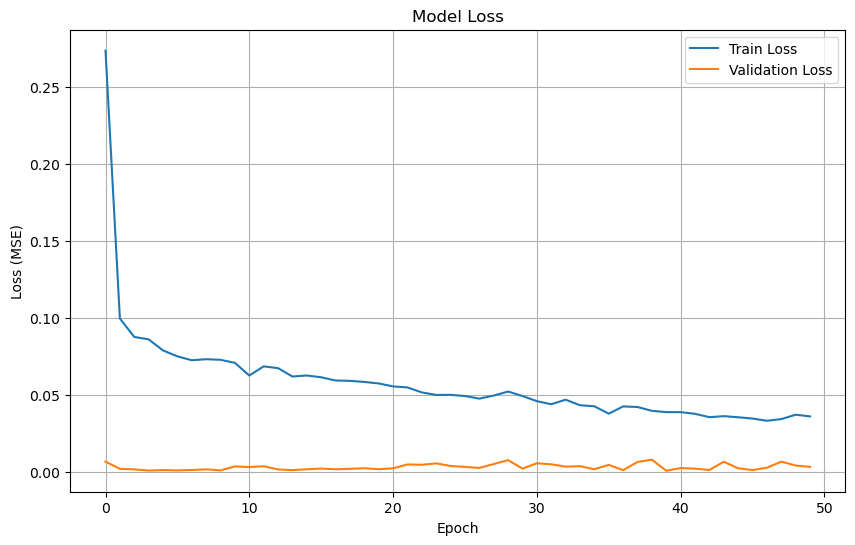

In [10]:
import matplotlib.pyplot as plt

# 10. Loss grafiğini çiz ve kaydet
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.savefig('training_history.png')

In [11]:
# 11. MAE grafiğini çiz ve kaydet
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.savefig('training_history_mae.png')
plt.close()

KeyError: 'mae'

<Figure size 1000x600 with 0 Axes>

In [14]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# 1. Veriyi yükle ve 'Date' sütununu index olarak ayarla
data = pd.read_csv('US_veri_normalization.csv', index_col='Date', parse_dates=True)

# 2. Veriyi train ve test setlerine ayır (%80 train, %20 test)
train_size = int(0.8 * len(data))
train = data.iloc[:train_size]
test = data.iloc[train_size:]

# 3. Veriyi LSTM için uygun formata getirme fonksiyonu
def create_dataset(dataset, time_step=12):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset.iloc[i-time_step:i, :].values)  # Tüm özellikleri al
        y.append(dataset.iloc[i, 0])  # 'Price' sütunu (0. indeks)
    return np.array(X), np.array(y)

# 4. Train ve test setleri için X ve y oluştur
time_step = 12
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

# 5. LSTM modelini kur
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  # Tek bir çıktı: Price tahmini

# 6. Modeli derle (MAE metriği ekleniyor)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# 7. Modeli eğit
history = model.fit(X_train, y_train, epochs=50, batch_size=32, 
                    validation_data=(X_test, y_test), verbose=1)

# 8. Test seti üzerinde loss ve MAE'yi hesapla
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {test_loss}')
print(f'Test MAE: {test_mae}')

# 9. Eğitim sürecindeki metrik değerlerini göster
print("\nEğitim Sürecindeki Metrik Değerleri:")
for epoch, (loss, mae, val_loss, val_mae) in enumerate(zip(
    history.history['loss'], history.history['mae'], 
    history.history['val_loss'], history.history['val_mae'])):
    print(f"Epoch {epoch+1}: Train Loss = {loss:.6f}, Train MAE = {mae:.6f}, "
          f"Validation Loss = {val_loss:.6f}, Validation MAE = {val_mae:.6f}")



Epoch 1/50


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


168/168 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.5039 - mae: 0.5074 - val_loss: 0.0016 - val_mae: 0.0350
Epoch 2/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1065 - mae: 0.1810 - val_loss: 0.0019 - val_mae: 0.0399
Epoch 3/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1041 - mae: 0.1625 - val_loss: 5.5235e-04 - val_mae: 0.0144
Epoch 4/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0894 - mae: 0.1494 - val_loss: 0.0060 - val_mae: 0.0731
Epoch 5/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0786 - mae: 0.1413 - val_loss: 0.0015 - val_mae: 0.0293
Epoch 6/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0847 - mae: 0.1414 - val_loss: 0.0016 - val_mae: 0.0280
Epoch 7/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0628 - mae: 0.1252 - val_loss: 0.0038 - val_mae: 0.0551
Epoch 8/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0718 - mae: 0.1277 - val_loss: 0.0072 - val_mae: 0.0802
Epoch 9/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0

In [13]:
# 10. Loss grafiğini çiz ve kaydet
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Model Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.savefig('training_history_mse.png')
plt.close()

# 11. MAE grafiğini çiz ve kaydet
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.savefig('training_history_mae.png')
plt.close()

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
# Veriyi yükleme ve önişleme
def load_data():
    # Veriyi CSV formatından yükle
    df = pd.read_csv('US_veri_normalization.csv', parse_dates=['Date'])
    
    # Eksik değerleri kontrol et ve temizle
    print("Eksik değer sayısı:", df.isnull().sum().sum())
    df = df.dropna(subset=['Price'])
    
    # Tarihe göre sırala
    df = df.sort_values('Date')
    
    # Sadece 'Price' sütununu kullan
    prices = df[['Date', 'Price']].set_index('Date')
    return prices

# Veri setini yükle
data = load_data()

Eksik değer sayısı: 0


In [10]:
# Veriyi ölçeklendirme
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Zaman serisi verilerini LSTM için hazırlama
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Parametreler
SEQ_LENGTH = 60  # 3 aylık geçmiş veri
TEST_SIZE = 0.3  #%30 test verisi

# Veriyi dizilere dönüştür
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Eğitim-test bölümlemesi
split_idx = int(len(X) * (1 - TEST_SIZE))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [11]:
# LSTM modelini oluşturma
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(SEQ_LENGTH, 1)),
    Dropout(0.3),
    LSTM(80, return_sequences=False),
    Dropout(0.3),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Erken durdurma
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Modeli eğitme
history = model.fit(
    X_train, y_train,
    epochs=32,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# Tahmin yapma
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Ölçeklendirmeyi tersine çevirme
train_predict = scaler.inverse_transform(train_predict)
y_train_actual = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform(y_test)

# Metrikleri hesaplama fonksiyonu
def calculate_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual, predicted)
    
    # Adjusted R2 hesaplama
    n = len(actual)
    p = 1  # Bağımsız değişken sayısı
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'Adjusted R2': adj_r2
    }

# Eğitim ve test metrikleri
train_metrics = calculate_metrics(y_train_actual, train_predict)
test_metrics = calculate_metrics(y_test_actual, test_predict)

print("\nEğitim Seti Metrikleri:")
for metric, value in train_metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nTest Seti Metrikleri:")
for metric, value in test_metrics.items():
    print(f"{metric}: {value:.4f}")



Epoch 1/32


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


146/146 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0353 - val_loss: 0.0069
Epoch 2/32
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0107 - val_loss: 0.0072
Epoch 3/32
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0107 - val_loss: 0.0066
Epoch 4/32
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0080 - val_loss: 0.0062
Epoch 5/32
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0077 - val_loss: 0.0063
Epoch 6/32
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0077 - val_loss: 0.0065
Epoch 7/32
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0082 - val_loss: 0.0060
Epoch 8/32
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0063 - val_loss: 0.0062
Epoch 9/32
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0075 - val_loss: 0.0061
Epoch 10/32
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0070 - val_loss: 0.0059
Epoch 11/32
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0060 - val_loss: 0.0059
Epoch 12/32
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/ste

In [ ]:
# Grafikleri çizme
plt.figure(figsize=(15, 12))

# Gerçek vs Tahmin scatter plot
plt.subplot(2, 2, 1)
plt.scatter(y_test_actual, test_predict, alpha=0.6)
plt.plot([min(y_test_actual), max(y_test_actual)], [min(y_test_actual), max(y_test_actual)], 'r--')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')
plt.title('Gerçek vs Tahmin Değerleri (Test Seti)')
plt.grid(True)

# Hata dağılımı histogramı
plt.subplot(2, 2, 2)
errors = y_test_actual.flatten() - test_predict.flatten()
sns.histplot(errors, kde=True)
plt.xlabel('Tahmin Hataları')
plt.ylabel('Frekans')
plt.title('Tahmin Hatalarının Dağılımı')
plt.grid(True)

# Kayıp eğrisi
plt.subplot(2, 2, 3)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoklar')
plt.ylabel('Kayıp')
plt.title('Model Kaybının Gelişimi')
plt.legend()
plt.grid(True)

# Gerçek vs Tahmin zaman serisi
plt.subplot(2, 2, 4)
test_dates = data.index[split_idx + SEQ_LENGTH:]
plt.plot(test_dates, y_test_actual, label='Gerçek Değerler')
plt.plot(test_dates, test_predict, label='Tahminler', alpha=0.7)
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.title('Zaman Serisi Üzerinde Gerçek vs Tahmin')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
